**CURSO:** DS-61

**ALUMNO:** Nicolás García Gómez

# **Proyecto 2: Análisis de mercado inmobiliario**
### Ingeniería de features, Modelos avanzados e Interpretación de modelos

## **Objetivo**

El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

**El trabajo se organiza en tres etapas:**

## **ETAPAS DEL PROYECTO**

## **EDA inicial**

##  **PARTE A - Transformación de Datos**

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

- Detección y eliminación de Outliers
- Encoding
- Imputación de valores faltantes
- Escalado de datos
- Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

## **PARTE B - Modelos Avanzados**

- Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

- Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

- Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

## **PARTE C - Interpretación de modelos**

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

- ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

- ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

## **DESAFÍO OPCIONAL**

Aplica una **técnica de Clustering** sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

##  **Resultados Proyecto 1 - Repaso**

Modelo => Regresión lineal
- RMSE en train: 199.173,83.
- RMSE en test: 202.449,37.
- Dataset utilizado: Dataset original con filtros solicitados.

Modelo => Árbol de Decisión
- Hiperparámetro optimizado: Max Depth.
- Max Depth seleccionado: 17.
- RMSE en train: 64.721,07.
- RMSE en test: 146.092,76.
- Dataset utilizado: Dataset original con filtros solicitados.

Modelo => KNN vecinos más cercanos
- Hiperparámetro optimizado: Cantidad de vecinos "k"
- Max cant de vecinos: 3.
- RMSE en train: 103.804,21.
- RMSE en test: 152.317,82.
- Dataset utilizado: Dataset original con filtros solicitados.

##  **LIBRERÍAS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import PercentFormatter # para dar formato de porcentaje a las tablas de frecuencia


warnings.filterwarnings('ignore')

In [ ]:
class color:
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## **EDA inicial**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Proyecto 2 Acamica/DS_Proyecto_01_Datos_Properati.csv"

In [ ]:
df = pd.read_csv(path)

### Breve repaso de la estructira del set de datos (los detalles finos los vimos en el Proyecto 1)

In [ ]:
df.head(1)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.60588,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta


In [ ]:
df.shape

(146660, 19)

In [ ]:
# Revisamos los valores únicos de cada una de las columnas del data set. 

for col in df.columns:
    print(col, len(df[col].unique()), 'valore diferentes')

start_date 366 valore diferentes
end_date 412 valore diferentes
created_on 366 valore diferentes
lat 59637 valore diferentes
lon 60076 valore diferentes
l1 1 valore diferentes
l2 4 valore diferentes
l3 89 valore diferentes
rooms 25 valore diferentes
bedrooms 16 valore diferentes
bathrooms 15 valore diferentes
surface_total 1844 valore diferentes
surface_covered 877 valore diferentes
price 6821 valore diferentes
currency 1 valore diferentes
title 77733 valore diferentes
description 106668 valore diferentes
property_type 10 valore diferentes
operation_type 1 valore diferentes


In [ ]:
# valores faltantas
df.isna().sum() 

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

**Campos con información faltante**
* Lat
* Long
* Bathroomd
* Surfcae_total
* surface_covered

In [ ]:
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [ ]:
#Visualizamos la variable precio sin notación cientifica
df['price'].describe().apply(lambda x: format(x, '.2f'))

count      146660.00
mean       241221.08
std        318519.46
min          5500.00
25%        111000.00
50%        166000.00
75%        265000.00
max      32434232.00
Name: price, dtype: object

In [ ]:
#Obervamos el registrs con el maximo valor de precio
df[df.price > 32000000]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
76894,2019-10-25,2019-11-06,2019-10-25,-34.593956,-58.415855,Argentina,Capital Federal,Palermo,1.0,1.0,4.0,43.0,43.0,32434232.0,USD,Venta Departamento en Palermo Capital Federal ...,"Departamento en Venta, PRUEBA PRUEBA, con una...",Departamento,Venta


Se observan algunos posibles 'outliers' como ser propiedades con 15 baños, 35 ambientes, 14 baños. Estos podrían ser errores en los datos o tratarse de propiedades particulares como por ejemplo un hotel.

#### Revisión de registros duplicadas

En el proyecto 1 se efectuo esta revisión pero no se aplico (no se eliminaron las filas duplicadas) ya que los checks intermedios de cantidades que se colocaron en el ejercicio las tenían en cuenta. Ahora propongo eliminarlas ya que son registros duplicados que no suman valor y trabajar con un set de datos sin valores duplicados

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (2358, 19)


In [ ]:
# Genero nuevo set ya sin registros duplicados 
df_1=df.drop_duplicates()

In [ ]:
df_1.shape

(144302, 19)

In [ ]:
# Verifico que ya no existen duplicados en el set de datos
df_1[df_1.duplicated()].shape

(0, 19)

- Data set original tiene ==> **146.660 filas**.
- Encontramos ==> **2358 filas duplicadas**.
- **TOTAL FILAS REMANENTES ==> 144.302**

#### Clasificación por tipo de propiedad según barrios y regiones
- Tabla de de frecuencia
- Diagrama de Pareto

Agrupamiento por tipo de proiedad

                 Frec_abs  Frec_rel_%  frec_rel_%_acum
Departamento       105276   72.955330        72.955330
Casa                21443   14.859808        87.815138
PH                  14103    9.773253        97.588391
Lote                 1308    0.906432        98.494823
Oficina               635    0.440049        98.934873
Otro                  374    0.259179        99.194051
Local comercial       325    0.225222        99.419273
Casa de campo         314    0.217599        99.636873
Depósito              265    0.183643        99.820515
Cochera               259    0.179485       100.000000


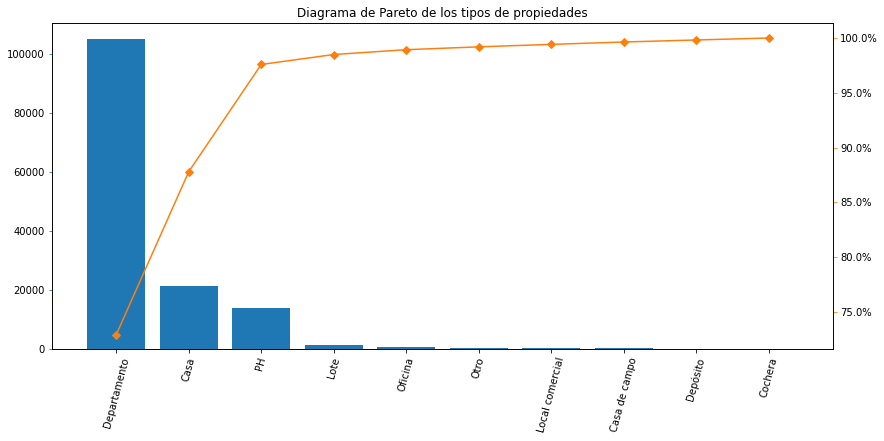


Agrupamiento por región

                          Frec_abs  Frec_rel_%  frec_rel_%_acum
Capital Federal              90905   62.996355        62.996355
Bs.As. G.B.A. Zona Norte     23691   16.417652        79.414007
Bs.As. G.B.A. Zona Sur       17140   11.877867        91.291874
Bs.As. G.B.A. Zona Oeste     12566    8.708126       100.000000


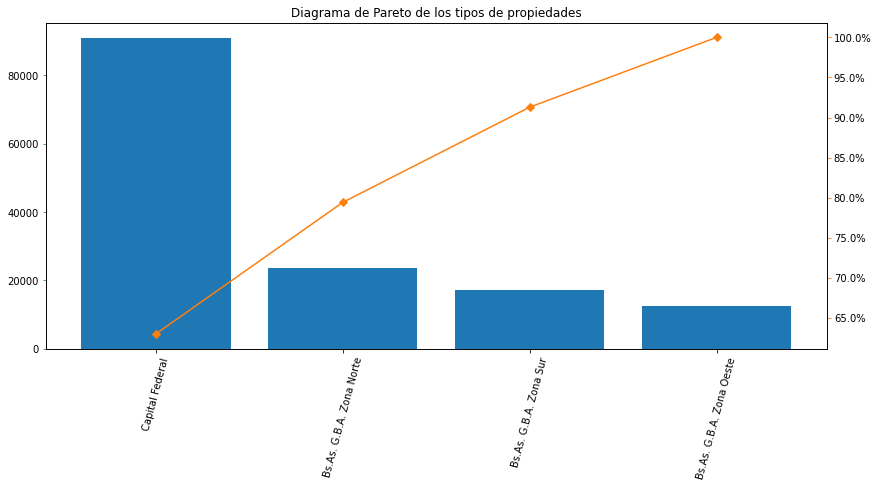


Agrupamiento por barrio

                 Frec_abs  Frec_rel_%  frec_rel_%_acum
Palermo             12797    8.868207         8.868207
Tigre                8244    5.713019        14.581225
Almagro              7316    5.069923        19.651148
Belgrano             6848    4.745603        24.396751
Caballito            6469    4.482959        28.879711
Villa Crespo         6265    4.341589        33.221300
Recoleta             5850    4.053998        37.275298
La Plata             4346    3.011739        40.287037
La Matanza           3726    2.582085        42.869122
Pilar                3677    2.548128        45.417250
Lomas de Zamora      3598    2.493382        47.910632
Villa Urquiza        3282    2.274397        50.185029
Tres de Febrero      3237    2.243212        52.428241
Vicente López        3219    2.230738        54.658979
Barrio Norte         3178    2.202326        56.861305
Balvanera            2950    2.044324        58.905628
Flores               2551    1.767820  

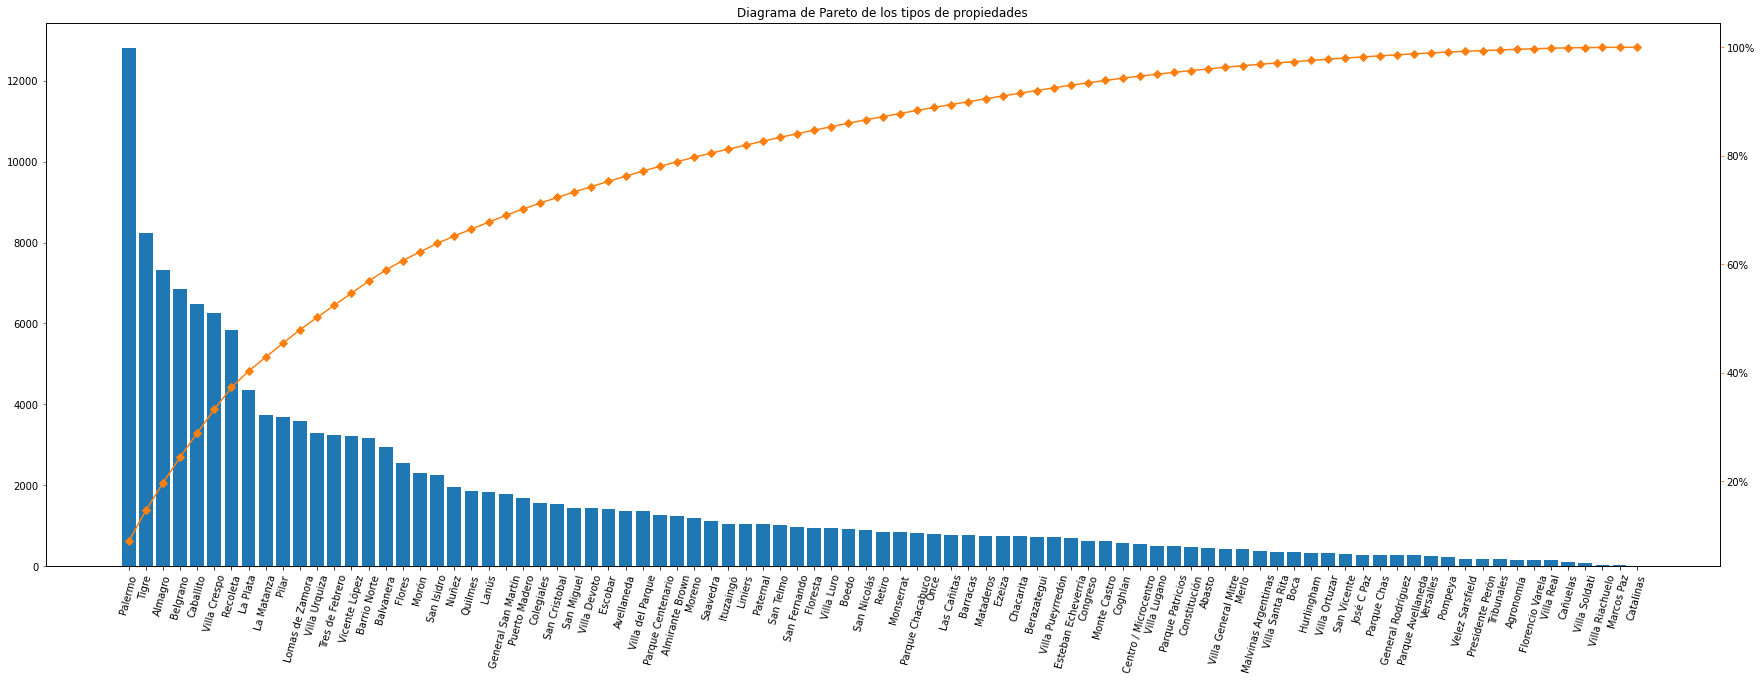


Barrios con más propiedades por región

                          l2               l3  cantidad
58           Capital Federal          Palermo     12797
8   Bs.As. G.B.A. Zona Norte            Tigre      8244
34           Capital Federal          Almagro      7316
38           Capital Federal         Belgrano      6848
41           Capital Federal        Caballito      6469
76           Capital Federal     Villa Crespo      6265
67           Capital Federal         Recoleta      5850
26    Bs.As. G.B.A. Zona Sur         La Plata      4346
13  Bs.As. G.B.A. Zona Oeste       La Matanza      3726
4   Bs.As. G.B.A. Zona Norte            Pilar      3677
28    Bs.As. G.B.A. Zona Sur  Lomas de Zamora      3598
87           Capital Federal    Villa Urquiza      3282
18  Bs.As. G.B.A. Zona Oeste  Tres de Febrero      3237
9   Bs.As. G.B.A. Zona Norte    Vicente López      3219
37           Capital Federal     Barrio Norte      3178
35           Capital Federal        Balvanera      2950
49     

In [ ]:
# TABLA DE FRECUECIAS - TIPO DE PROPIEDAD
#Agrupamiento por tipo de proiedad
print('Agrupamiento por tipo de proiedad')
print('')
frec = pd.value_counts(df_1['property_type'])

#transformo en el df de pandas
df_frec= pd.DataFrame(frec)

#agrego columnas 'Frec_abs'
df_frec.columns = ['Frec_abs']

#calculo la columna 'Frec_abs'
df_frec['Frec_rel_%'] = 100* (df_frec.Frec_abs / df_1.shape[0])

#tabla de frecuencias absolutas / reltivas / acumulada
frec_rel_val= df_frec['Frec_rel_%'].values # es una lista que contiene los valores de frec_rel_%

acum = []
valor_acum = 0

for i in frec_rel_val:
    valor_acum = valor_acum + i 
    acum.append(valor_acum)

df_frec['frec_rel_%_acum'] = acum
print(df_frec) # son los tipos de propiedades ordenados de mayor a menos según su cantidad - frecuencia absoluta - frecuencia relativa.

# GRÁFICO DE PARETO
fig= plt.figure (figsize = (14,6))
ax= fig.add_subplot(1,1,1)

#Asignamos el titulo
ax.set_title ('Diagrama de Pareto de los tipos de propiedades')

#Creamos un grafico de barras con la frec_abs
ax.bar (df_frec.index, df_frec['Frec_abs'], color='C0')
        
    
#Graficamos la 'frec_rel_%_acum'
ax2 = ax.twinx() # generamos un nuevo eje
ax2.plot (df_frec.index, df_frec['frec_rel_%_acum'], color ='C1', marker='D', ms=5)
ax2.yaxis.set_major_formatter (PercentFormatter()) # para que los numeros del eje de la derecha esten en %

#Etiquetamos, asignamos color y damos rotación a las etiquetes de los ejes
ax.tick_params (axis='y', color = 'C0')
ax2.tick_params (axis='y', color = 'C1')
ax.set_xticklabels(df_frec.index, rotation=75)

plt.show()
print('')

#####################################################################################

# TABLA DE FRECUECIAS - REGIÓN
#Agrupamiento por REGIÓN
print('Agrupamiento por región')
print('')
frec = pd.value_counts(df_1['l2'])

#transformo en el df de pandas
df_frec= pd.DataFrame(frec)

#agrego columnas 'Frec_abs'
df_frec.columns = ['Frec_abs']

#calculo la columna 'Frec_abs'
df_frec['Frec_rel_%'] = 100* (df_frec.Frec_abs / df_1.shape[0])

#tabla de frecuencias absolutas / reltivas / acumulada
frec_rel_val= df_frec['Frec_rel_%'].values # es una lista que contiene los valores de frec_rel_%

acum = []
valor_acum = 0

for i in frec_rel_val:
    valor_acum = valor_acum + i 
    acum.append(valor_acum)

df_frec['frec_rel_%_acum'] = acum
print(df_frec) # registros ordenados de mayor a menos según su cantidad por zona - frecuencia absoluta - frecuencia relativa.

# GRÁFICO DE PARETO
fig= plt.figure (figsize = (14,6))
ax= fig.add_subplot(1,1,1)

#Asignamos el titulo
ax.set_title ('Diagrama de Pareto de los tipos de propiedades')

#Creamos un grafico de barras con la frec_abs
ax.bar (df_frec.index, df_frec['Frec_abs'], color='C0')
        
    
#Graficamos la 'frec_rel_%_acum'
ax2 = ax.twinx() # generamos un nuevo eje
ax2.plot (df_frec.index, df_frec['frec_rel_%_acum'], color ='C1', marker='D', ms=5)
ax2.yaxis.set_major_formatter (PercentFormatter()) # para que los numeros del eje de la derecha esten en %

#Etiquetamos, asignamos color y damos rotación a las etiquetes de los ejes
ax.tick_params (axis='y', color = 'C0')
ax2.tick_params (axis='y', color = 'C1')
ax.set_xticklabels(df_frec.index, rotation=75)

plt.show()
print('')

###################################################################################################################

# TABLA DE FRECUECIAS - BARRIO
#Agrupamiento por barrio
print('Agrupamiento por barrio')
print('')
frec = pd.value_counts(df_1['l3'])

#transformo en el df de pandas
df_frec= pd.DataFrame(frec)

#agrego columnas 'Frec_abs'
df_frec.columns = ['Frec_abs']

#calculo la columna 'Frec_abs'
df_frec['Frec_rel_%'] = 100* (df_frec.Frec_abs / df_1.shape[0])

#tabla de frecuencias absolutas / reltivas / acumulada
frec_rel_val= df_frec['Frec_rel_%'].values # es una lista que contiene los valores de frec_rel_%

acum = []
valor_acum = 0

for i in frec_rel_val:
    valor_acum = valor_acum + i 
    acum.append(valor_acum)

df_frec['frec_rel_%_acum'] = acum
print(df_frec.head(20)) # registros ordenados de mayor a menos según su cantidad por - frecuencia absoluta - frecuencia relativa.
barrios = df_frec

# GRÁFICO DE PARETO
fig= plt.figure (figsize = (30,10))
ax= fig.add_subplot(1,1,1)

#Asignamos el titulo
ax.set_title ('Diagrama de Pareto de los tipos de propiedades')

#Creamos un grafico de barras con la frec_abs
ax.bar (df_frec.index, df_frec['Frec_abs'], color='C0')
        
    
#Graficamos la 'frec_rel_%_acum'
ax2 = ax.twinx() # generamos un nuevo eje
ax2.plot (df_frec.index, df_frec['frec_rel_%_acum'], color ='C1', marker='D', ms=5)
ax2.yaxis.set_major_formatter (PercentFormatter()) # para que los numeros del eje de la derecha esten en %

#Etiquetamos, asignamos color y damos rotación a las etiquetes de los ejes
ax.tick_params (axis='y', color = 'C0')
ax2.tick_params (axis='y', color = 'C1')
ax.set_xticklabels(df_frec.index, rotation=75)

plt.show()
print('')

#Revisamos en que región están los barrios con más propiedades
print('Barrios con más propiedades por región')
print('')


print(df_1.groupby(['l2','l3']).size().reset_index(name='cantidad').sort_values('cantidad',ascending=False).head(20))

- Revisamos los barrios por cada región

In [ ]:
#Listado de barrios únicos por región
print(df_1.groupby('l2')['l3'].unique())

l2
Bs.As. G.B.A. Zona Norte    [Pilar, Tigre, San Isidro, San Miguel, Vicente...
Bs.As. G.B.A. Zona Oeste    [Morón, La Matanza, Ituzaingó, Tres de Febrero...
Bs.As. G.B.A. Zona Sur      [La Plata, Lanús, Avellaneda, Esteban Echeverr...
Capital Federal             [San Cristobal, Boedo, Palermo, Villa Crespo, ...
Name: l3, dtype: object


In [ ]:
#A modo de ejmplo como la sentencia de arriba no llega a visualizarce el detalle completo de barrios => Listado de los 10 barrios de zona norte
zona_norte_10 = df_1[df_1.l2=='Bs.As. G.B.A. Zona Norte'].groupby('l3').nunique()
zona_norte_10.iloc[:,-1]

l3
Escobar                1
General San Martín     1
José C Paz             1
Malvinas Argentinas    1
Pilar                  1
San Fernando           1
San Isidro             1
San Miguel             1
Tigre                  1
Vicente López          1
Name: operation_type, dtype: int64

In [ ]:
# cantidad de barrios únicos por región
zonas = df_1.groupby('l2')['l3'].nunique().reset_index(name='cantidad_barrios_x_región').sort_values('cantidad_barrios_x_región',ascending=False).head(20)

# cantidad de propiedades por región
barrios = df_1.groupby(['l2']).size().reset_index(name='cantidad_x_región').sort_values('cantidad_x_región',ascending=False).head(20)

#Uno las dos tablas la cantidad de proiedades y barrios por región
zona_1= zonas.merge(barrios, on = 'l2', how ='inner')

#Agrego al set zona_1 el valor promedio de la cantidad de propiedades por barrio
zona_1['Prom_propiedad_x_barrio']= zona_1['cantidad_x_región'] / zona_1['cantidad_barrios_x_región']

zona_1

,l2,cantidad_barrios_x_región,cantidad_x_región,Prom_propiedad_x_barrio
0,Capital Federal,57,90905,1594.824561
1,Bs.As. G.B.A. Zona Sur,13,17140,1318.461538
2,Bs.As. G.B.A. Zona Norte,10,23691,2369.100000
3,Bs.As. G.B.A. Zona Oeste,9,12566,1396.222222


**CONCLUSIONES EDA**
 
 El 97.5% de los registros están acumulados en tres tipos de propiedes
  - Departamento
  - Casa
  - PH

Cada uno de los demás tipo de propiedades tienen individualmente un peso menor al 1% (frec. absoluta)

Casi el 63% de las propiedades se encuentran en Capital Federal y el 65% de las propiedades se distribuyen en 20 barrios. Al revisar estos 20 barrios tenemos que 11 del top 20 están en Capital Federal.

Adicionamos el cálculo de cantidad de propiedades promedio por barrio de cada zona. Donde zona norte tiene el promedio más elevado de cantidad de propiedades por barrio y zona sur el menor


Definimos el set de datos a trabajar en función de las conclusiones mencionadas. 
- Nos quedamos con los tres tipos de propiedades mas relevantes => 'Departamento','Casa','PH'
- La región (zona) de más importancia => 'Capital Federal'
- Nos quedamos con las columnas => lat, long, l2, l3,rooms, bedrooms, bathrooms, surface total, surface covered, price, property type
- El set de datos no contien registros duplicados ya que fueron eliminados

In [ ]:
#Filtro el data frame solo con el top 3 de propiedades
df_1_mascara=(df_1.property_type.isin(['Departamento','PH','Casa']) & df_1.l2.isin(['Capital Federal']))
df_2=df_1[df_1_mascara]

In [ ]:
print(df_2.groupby(['l2','property_type']).size().reset_index(name='cantidad').sort_values('cantidad',ascending=False))

                l2 property_type  cantidad
1  Capital Federal  Departamento     77629
2  Capital Federal            PH      9574
0  Capital Federal          Casa      2671


In [ ]:
# Me quedo con las columnas del set de datos que entiendo suman valor y quito las que no
df_2 = df_2.drop(columns=["l1","end_date", "start_date","created_on", "currency", "description", "operation_type", "title"])

In [ ]:
df_2.shape

(89874, 11)

In [ ]:
df_2.head()

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [ ]:
df_2.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,85493.000000,85479.000000,89874.000000,89874.000000,87727.000000,81157.000000,80850.000000,8.987400e+04
mean,-34.599089,-58.436074,2.965129,1.960456,1.558562,112.885494,95.169746,2.587195e+05
std,0.024042,0.036391,1.317503,1.074358,0.858386,989.133753,785.177443,3.190762e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613911,-58.459838,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599415,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584065,-58.409915,4.000000,3.000000,2.000000,111.000000,96.000000,2.782000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [ ]:
#Renombramos columnas para tener una mayor claridad y relación del nombre de la columna con su contenido
df_1.rename({'l2':'region','l3':'barrio'}, axis=1, inplace= True)
df_2.rename({'l2':'region','l3':'barrio'}, axis=1, inplace= True)

In [ ]:
#Revisamos el % de valores faltantes por cada columna
for col in df_2.columns:
  nulos= df_2[col].isna().sum()
  print(col, "{:.2f}%".format(nulos*100/89874))

lat 4.87%
lon 4.89%
region 0.00%
barrio 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 2.39%
surface_total 9.70%
surface_covered 10.04%
price 0.00%
property_type 0.00%


##  **PARTE A - Transformación de Datos**



1-Detección y eliminación de Outliers

2-Imputación de valores faltantes => https://www.youtube.com/watch?v=aCrHFlX22kU

3-Encoding

4-Escalado de datos

5-Seleccionar atributos relevantes/reducción de dimensionalidad.

6-Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

###**1-Detección y eliminación de Outliers**

Llaman la atención a modo de valores atipicos algunos que vemos al ejecutar el 
describe() como ser, 
- 26 rooms 
- 15 Bedroods
- 14 bathrooms
- Superficies cubiertas y totales de más de 120 mil m2
- Precio mayor a 32 millones

A simple vista esto puedo significar errores de datos en el set por lo cual nos proponemos revisarlo en detalle

Algunas técnicas a útilizar
- Visualización: Boxplots
- Por rango intercuartílico (Interquartile Range)
- Regla de las tres sigmas

En principio como lo hicimos en al proyecto 1 buscamos quitar del data set aquellos registros donde la superficie total es menos a la suerficie cubierta

In [ ]:
# Registros con valores de superficie y superficie total mayor que cero
print('Shape:\n',df_2[np.logical_and (df_2['surface_covered'] >= 0, df_2['surface_total'] >= 0)].shape)

Shape:
 (80654, 11)


In [ ]:
# Registros con valores de superficie cubierta mayores a la superficie total
print('Agrupado:\n',df_2[df_2['surface_covered'] > df_2['surface_total'] ]['property_type'].value_counts())
print('')
print('Total:',df_2[df_2['surface_covered'] > df_2['surface_total'] ]['property_type'].value_counts().sum())

Agrupado:
 Departamento    531
Casa            189
PH               40
Name: property_type, dtype: int64

Total: 760


In [ ]:
# Registros con valores de superficie cubierta igual o menor a la superficie total
print('Agrupado:\n',df_2[df_2['surface_covered'] <= df_2['surface_total'] ]['property_type'].value_counts())
print('')
print('Total:',df_2[df_2['surface_covered'] <= df_2['surface_total'] ]['property_type'].value_counts().sum())

Agrupado:
 Departamento    68424
PH               9437
Casa             2033
Name: property_type, dtype: int64

Total: 79894


In [ ]:
# Filtramos las instancias que poseean superficie cubierta mayor a superficie total ya que entiendo esto sería una inconsistencia. 
print(color.BOLD + 'Cantidad sin las instancias que poseean superficie cubierta mayor a superficie total '+ color.END)
print('')
df_3=df_2[df_2['surface_covered'] <= df_2['surface_total'] ]
df_3.shape

Cantidad sin las instancias que poseean superficie cubierta mayor a superficie total 



(79894, 11)

In [ ]:
#Revisamos el % de valores faltantes por cada columna donde vemos que superficie cubierta y total ya no presentan valores faltantes
print(color.BOLD + '% de valores faltantes por cada columna '+ color.END)
print('')
for col in df_3.columns:
  nulos= df_3[col].isna().sum()
  print(col, "{:.2f}%".format(nulos*100/79894))

% de valores faltantes por cada columna 

lat 5.16%
lon 5.16%
region 0.00%
barrio 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 1.04%
surface_total 0.00%
surface_covered 0.00%
price 0.00%
property_type 0.00%


#### Visualización de outliers

- Graficamos los boxplot e histogramas de las diferentes variables => rooms, bedrooms, bathrooms, surface_total, surface_covered y price

Text(0.5, 1.0, 'Distribución de la variable superficie')

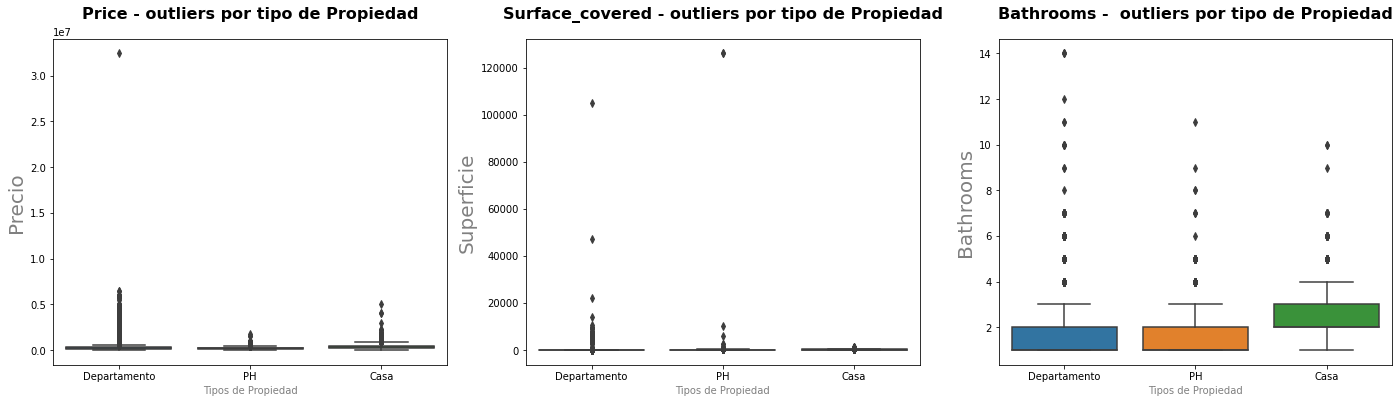

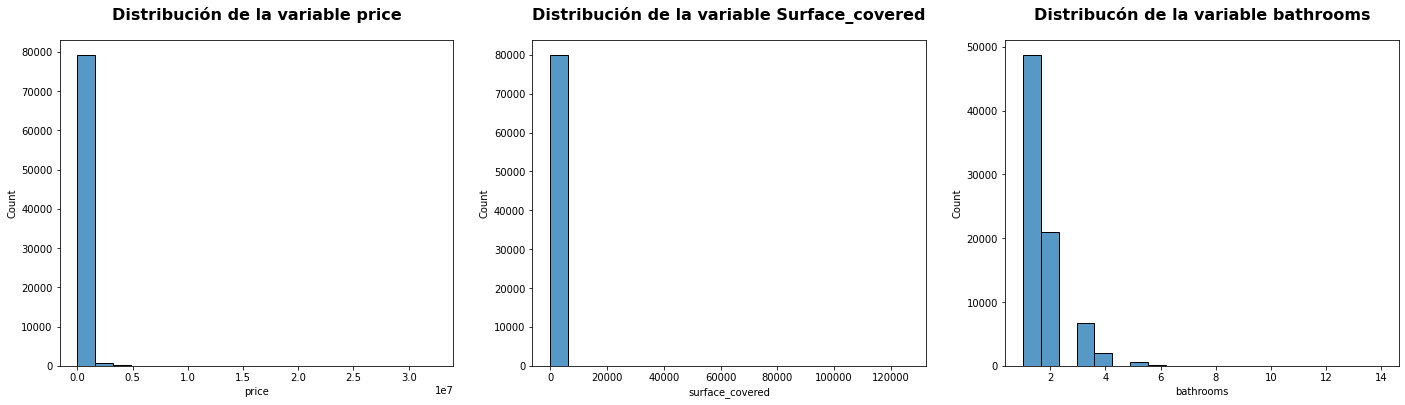

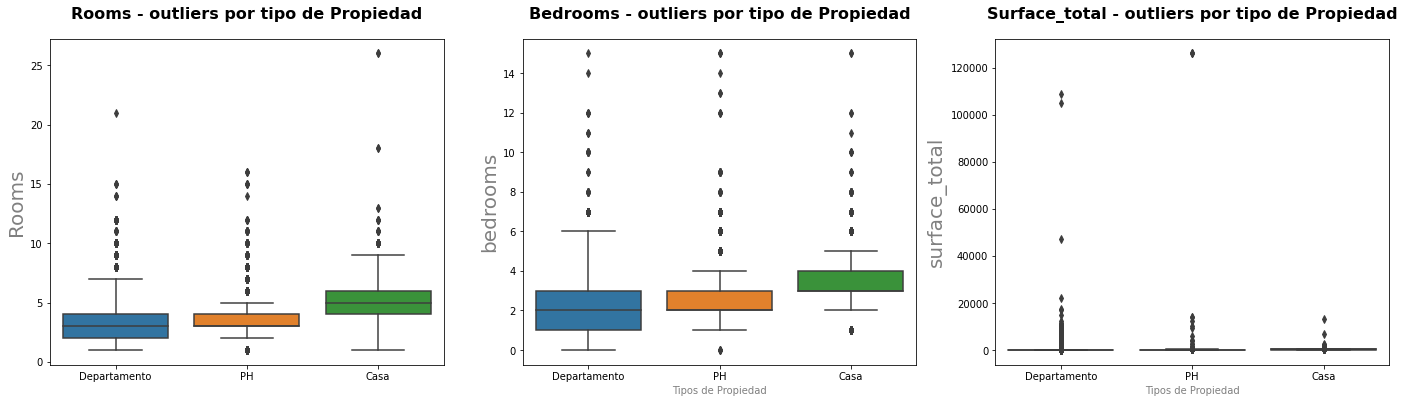

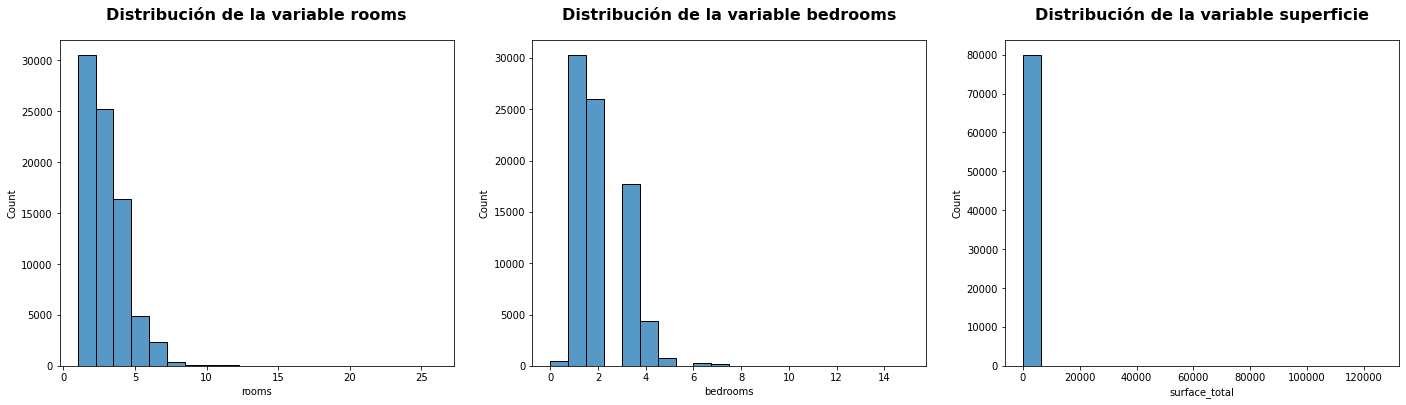

In [ ]:
# BOXPLOT

plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.boxplot(data = df_3, x = 'property_type', y = "price")
plt.title('Price - outliers por tipo de Propiedad', weight=10,fontweight= 'black', size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Precio', size = 20, color='gray')

plt.subplot(1,3,2)
sns.boxplot(data = df_3, x = 'property_type', y = "surface_covered")
plt.title('Surface_covered - outliers por tipo de Propiedad', weight=10,fontweight= 'black', size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Superficie', size = 20, color='gray')

plt.subplot(1,3,3)
sns.boxplot(data = df_3, x = 'property_type', y = "bathrooms")
plt.title('Bathrooms -  outliers por tipo de Propiedad', weight=10,fontweight= 'black', size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Bathrooms', size = 20, color='gray')

# HISTOGRAMA

plt.figure(figsize = (24,6))
plt.subplot(1,3,1)
sns.histplot(df_3['price'], bins =20)
plt.title('Distribución de la variable price', fontweight= 'black',fontsize = 16,pad= 20)

plt.subplot(1,3,2)
sns.histplot(df_3['surface_covered'], bins =20)
plt.title('Distribución de la variable Surface_covered', fontweight= 'black',fontsize = 16,pad= 20)

plt.subplot(1,3,3)
sns.histplot(df_3['bathrooms'], bins =20)
plt.title('Distribucón de la variable bathrooms', fontweight= 'black',fontsize = 16,pad= 20)

# BOXPLOT

plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.boxplot(data = df_3, x = 'property_type', y = "rooms")
plt.title('Rooms - outliers por tipo de Propiedad', weight=10,fontweight= 'black', size = 16, pad = 20)
plt.xlabel('', size = 10, color='gray')
plt.ylabel('Rooms', size = 20, color='gray')

plt.subplot(1,3,2)
sns.boxplot(data = df_3, x = 'property_type', y = "bedrooms")
plt.title('Bedrooms - outliers por tipo de Propiedad', weight=10,fontweight= 'black', size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('bedrooms', size = 20, color='gray')

plt.subplot(1,3,3)
sns.boxplot(data = df_3, x = 'property_type', y = "surface_total")
plt.title('Surface_total - outliers por tipo de Propiedad', weight=10,fontweight= 'black', size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('surface_total', size = 20, color='gray')

# HISTOGRAMA

plt.figure(figsize = (24,6))
plt.subplot(1,3,1)
sns.histplot(df_3['rooms'], bins =20)
plt.title('Distribución de la variable rooms', fontweight= 'black',fontsize = 16,pad= 20)

plt.subplot(1,3,2)
sns.histplot(df_3['bedrooms'], bins =20)
plt.title('Distribución de la variable bedrooms', fontweight= 'black',fontsize = 16,pad= 20)

plt.subplot(1,3,3)
sns.histplot(df_3['surface_total'], bins =20)
plt.title('Distribución de la variable superficie', fontweight= 'black',fontsize = 16,pad= 20)



Creamos una función para la eliminación de los outliers por el metodo IQR

In [ ]:
def remove_outliers_iqr(column, data):
  
    q1 = data[column].quantile(.25)
    q3 = data[column].quantile(.75)
    iqr = q3-q1
    min_iqr = q1-1.5*iqr
    max_iqr = q3+1.5*iqr

    return data.query(f'@min_iqr <= {column} <= @max_iqr')

Removemos los outliers

In [ ]:
df_3 = remove_outliers_iqr('rooms', df_3)
df_3 = remove_outliers_iqr('bedrooms', df_3)
df_3 = remove_outliers_iqr('bathrooms', df_3)
df_3 = remove_outliers_iqr('surface_total', df_3)
df_3 = remove_outliers_iqr('surface_covered', df_3)

Revisamos el set de datos con los outliers removidos

In [ ]:
df_3.shape

(67714, 11)

In [ ]:
#Revisamos el % de valores faltantes por cada columna
for col in df_3.columns:
  nulos= df_3[col].isna().sum()
  print(col, "{:.2f}%".format(nulos*100/67714))

lat 4.73%
lon 4.73%
region 0.00%
barrio 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 0.00%
surface_total 0.00%
surface_covered 0.00%
price 0.00%
property_type 0.00%


In [ ]:
df_3.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,64513.000000,64513.000000,67714.000000,67714.000000,67714.000000,67714.000000,67714.000000,6.771400e+04
mean,-34.598389,-58.435929,2.697492,1.760404,1.344892,71.274301,62.822503,1.923502e+05
std,0.023110,0.035010,0.965852,0.811096,0.566093,31.490793,25.952801,1.147922e+05
min,-34.695087,-58.530467,1.000000,0.000000,1.000000,13.000000,1.000000,7.500000e+03
25%,-34.612071,-58.458384,2.000000,1.000000,1.000000,47.000000,42.000000,1.180000e+05
50%,-34.599124,-58.433468,3.000000,2.000000,1.000000,65.000000,57.000000,1.630000e+05
75%,-34.584698,-58.411992,3.000000,2.000000,2.000000,90.000000,79.000000,2.350000e+05
max,-34.535909,-58.353930,7.000000,6.000000,3.000000,184.000000,138.000000,3.249900e+06


In [ ]:
df_2.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,85493.000000,85479.000000,89874.000000,89874.000000,87727.000000,81157.000000,80850.000000,8.987400e+04
mean,-34.599089,-58.436074,2.965129,1.960456,1.558562,112.885494,95.169746,2.587195e+05
std,0.024042,0.036391,1.317503,1.074358,0.858386,989.133753,785.177443,3.190762e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613911,-58.459838,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599415,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584065,-58.409915,4.000000,3.000000,2.000000,111.000000,96.000000,2.782000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Comparando por medio del describe() el df_2 y df_3 podemos ver como se ajustan los valores. En rooms, bedrooms, bathrooms los valores maximos se colocan más proximos a la media, tambien como lo hacen superficie cubierta y superficie total. En el caso del precio no vemos que esto suceda. 

In [ ]:
#Visualizamos la variable precio sin notación cientifica
df_3['price'].describe().apply(lambda x: format(x, '.2f'))

count      67714.00
mean      192350.19
std       114792.21
min         7500.00
25%       118000.00
50%       163000.00
75%       235000.00
max      3249900.00
Name: price, dtype: object

Graficamos los boxplot e histogramas nuevamente luego de correr la función de eliminación de outliers

Text(0.5, 1.0, 'Distribución de la variable superficie')

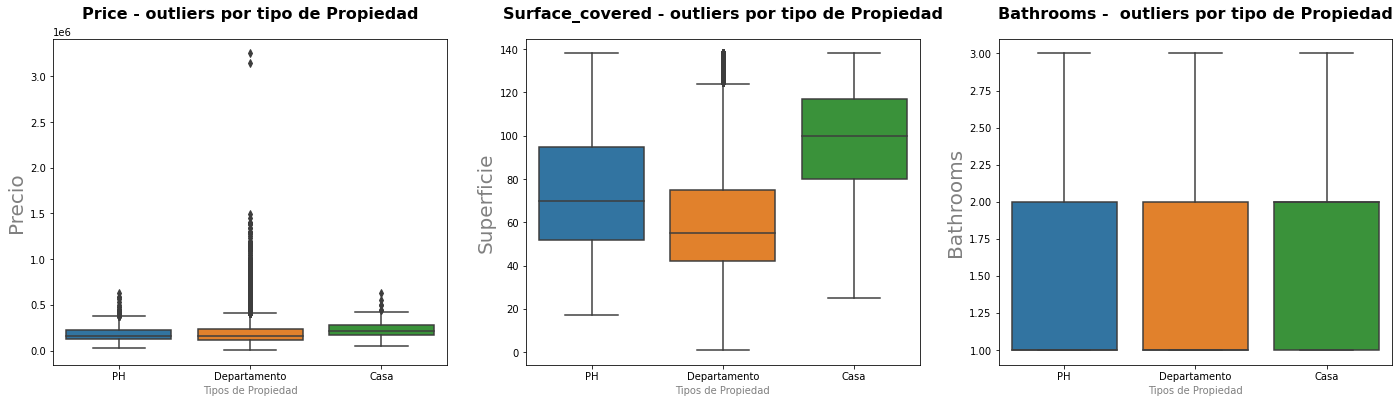

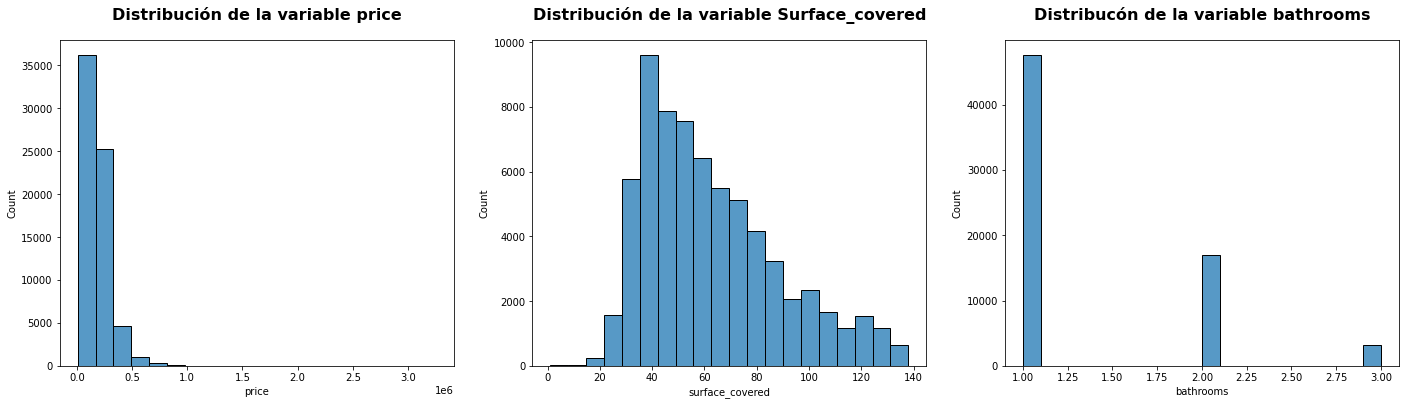

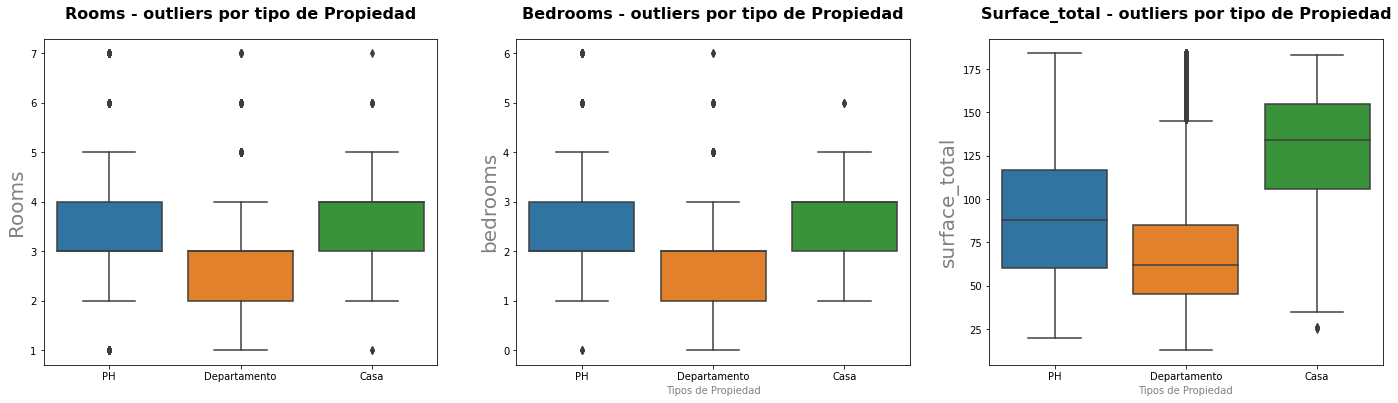

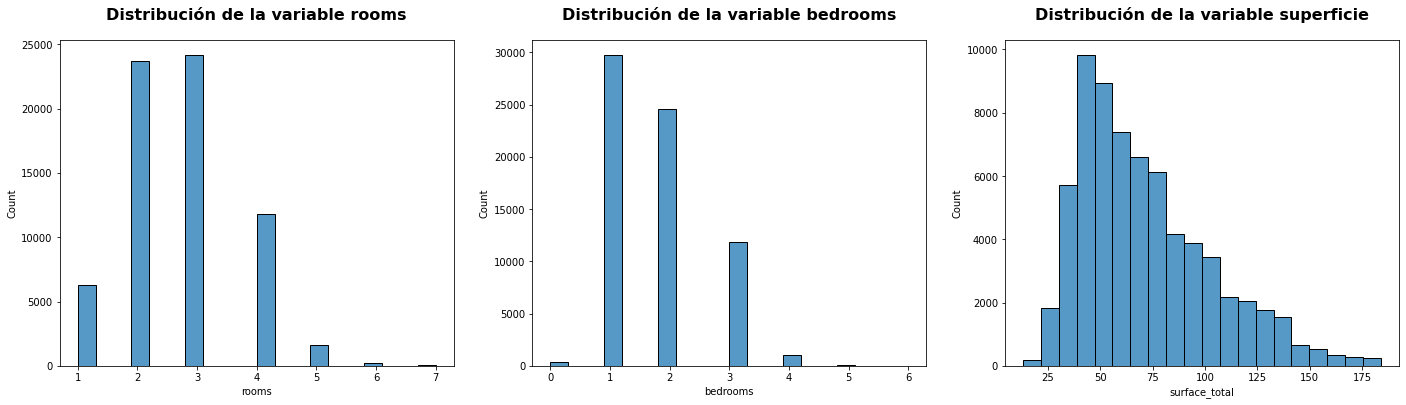

In [ ]:
# BOXPLOT

plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.boxplot(data = df_3, x = 'property_type', y = "price")
plt.title('Price - outliers por tipo de Propiedad', weight=10,fontweight= 'black', size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Precio', size = 20, color='gray')

plt.subplot(1,3,2)
sns.boxplot(data = df_3, x = 'property_type', y = "surface_covered")
plt.title('Surface_covered - outliers por tipo de Propiedad', weight=10,fontweight= 'black', size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Superficie', size = 20, color='gray')

plt.subplot(1,3,3)
sns.boxplot(data = df_3, x = 'property_type', y = "bathrooms")
plt.title('Bathrooms -  outliers por tipo de Propiedad', weight=10,fontweight= 'black', size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Bathrooms', size = 20, color='gray')

# HISTOGRAMA

plt.figure(figsize = (24,6))
plt.subplot(1,3,1)
sns.histplot(df_3['price'], bins =20)
plt.title('Distribución de la variable price', fontweight= 'black',fontsize = 16,pad= 20)

plt.subplot(1,3,2)
sns.histplot(df_3['surface_covered'], bins =20)
plt.title('Distribución de la variable Surface_covered', fontweight= 'black',fontsize = 16,pad= 20)

plt.subplot(1,3,3)
sns.histplot(df_3['bathrooms'], bins =20)
plt.title('Distribucón de la variable bathrooms', fontweight= 'black',fontsize = 16,pad= 20)

# BOXPLOT

plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.boxplot(data = df_3, x = 'property_type', y = "rooms")
plt.title('Rooms - outliers por tipo de Propiedad', weight=10,fontweight= 'black', size = 16, pad = 20)
plt.xlabel('', size = 10, color='gray')
plt.ylabel('Rooms', size = 20, color='gray')

plt.subplot(1,3,2)
sns.boxplot(data = df_3, x = 'property_type', y = "bedrooms")
plt.title('Bedrooms - outliers por tipo de Propiedad', weight=10,fontweight= 'black', size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('bedrooms', size = 20, color='gray')

plt.subplot(1,3,3)
sns.boxplot(data = df_3, x = 'property_type', y = "surface_total")
plt.title('Surface_total - outliers por tipo de Propiedad', weight=10,fontweight= 'black', size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('surface_total', size = 20, color='gray')

# HISTOGRAMA

plt.figure(figsize = (24,6))
plt.subplot(1,3,1)
sns.histplot(df_3['rooms'], bins =20)
plt.title('Distribución de la variable rooms', fontweight= 'black',fontsize = 16,pad= 20)

plt.subplot(1,3,2)
sns.histplot(df_3['bedrooms'], bins =20)
plt.title('Distribución de la variable bedrooms', fontweight= 'black',fontsize = 16,pad= 20)

plt.subplot(1,3,3)
sns.histplot(df_3['surface_total'], bins =20)
plt.title('Distribución de la variable superficie', fontweight= 'black',fontsize = 16,pad= 20)

Al igual que vemos en el decribe cuando visulizamos las graficas vemos el efecto que ha tenido la eliminación de los outliers. Solo llama la atención como dijimos antes la variable precios que gracias a las graficas vemos que los valores llamativos estan en el tipo de propiedad 'departamento' en la cual entramos en detalle a continuación

In [ ]:
depto_sobrevaluado = (df_3.property_type.isin(['Departamento'])) & (df.price > 1600000)
df_3[depto_sobrevaluado]

,lat,lon,region,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
28275,-34.609558,-58.362674,Capital Federal,Puerto Madero,2.0,1.0,1.0,54.0,54.0,3150000.0,Departamento
116213,-34.593645,-58.399170,Capital Federal,Recoleta,3.0,2.0,2.0,82.0,73.0,3249900.0,Departamento


Vemos que los dos departamentos valuados por encima de los 1.6 millones de USD se encuntran en zonas exclusivas de Bs AS => Puerto Madero y Recoleta. Igualmente debidoa  la descripción de los mismos en terminos de superficie, cantidad de baños, habitaciones, etc. parece ser un error de carga y al ser solo dos registros en estas condiciones se decide eliminarlos para evitar sesgos. 

In [ ]:
df_3.drop(df_3[df_3.property_type.isin(['Departamento']) & (df.price > 1600000)].index, inplace=True) 

Volvemos a graficar el boxplot y el histograma para ver como nos queda ahora si la variable precio

Text(0.5, 1.0, 'Distribución de la variable price')

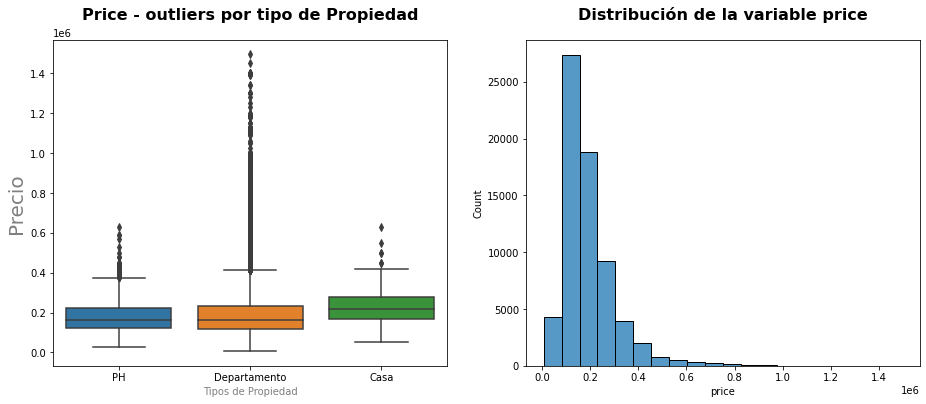

In [ ]:
# BOXPLOT

plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.boxplot(data = df_3, x = 'property_type', y = "price")
plt.title('Price - outliers por tipo de Propiedad', weight=10,fontweight= 'black', size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Precio', size = 20, color='gray')

# HISTOGRAMA

plt.subplot(1,3,2)
sns.histplot(df_3['price'], bins =20)
plt.title('Distribución de la variable price', fontweight= 'black',fontsize = 16,pad= 20)

###**2-Imputación de valores faltantes**

In [ ]:
df_3.shape

(67712, 11)

In [ ]:
#Revisamos el % de valores faltantes por cada columna
for col in df_3.columns: 
  nulos= df_3[col].isna().sum()
  print(col, "{:.2f}%".format(nulos*100/67712))

lat 4.73%
lon 4.73%
region 0.00%
barrio 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 0.00%
surface_total 0.00%
surface_covered 0.00%
price 0.00%
property_type 0.00%


In [ ]:
#Revisamos la cantidad de valores nulos por cada columna
print(color.BOLD + color.UNDERLINE + 'Nan values por columna'+ color.END)
print(df_3.isnull().sum())

Nan values por columna
lat                3201
lon                3201
region                0
barrio                0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
property_type         0
dtype: int64


Datos faltantes en las columnas
 - Lat => la asignamos en función del promedio de la latitud del barrio
 - Long => la asignamos en función del promedio de la latitud del barrio



In [ ]:
lon_city= df_3 [['lon','barrio']].groupby('barrio').agg(pd.Series.mean) # agrupo por barrio calculando el promedio de la longitud
lat_city= df_3 [['lat','barrio']].groupby('barrio').agg(pd.Series.mean) # agrupo por barrio calculando el promedio de la latitud
df_3= df_3.set_index('barrio') # defino mi indice con el barrio
df_3.lon.fillna(lon_city.to_dict()['lon'], inplace = True) # genero un diccionario para poder imputar los valores faltantes
df_3.lat.fillna(lat_city.to_dict()['lat'], inplace = True) # genero un diccionario para poder imputar los valores faltantes
df_3 = df_3.reset_index() # vuelvo al indice original
df_3.head()

,barrio,lat,lon,region,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Boedo,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,PH
1,Palermo,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0,PH
2,Palermo,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0,PH
3,Villa Crespo,-34.593779,-58.441239,Capital Federal,2.0,1.0,1.0,56.0,56.0,150000.0,PH
4,Villa Crespo,-34.600988,-58.433061,Capital Federal,2.0,1.0,1.0,70.0,70.0,159500.0,PH


Correboramos a nivel gráfico por medio de un scatter el calculo de las latitudes y longitudes promedio

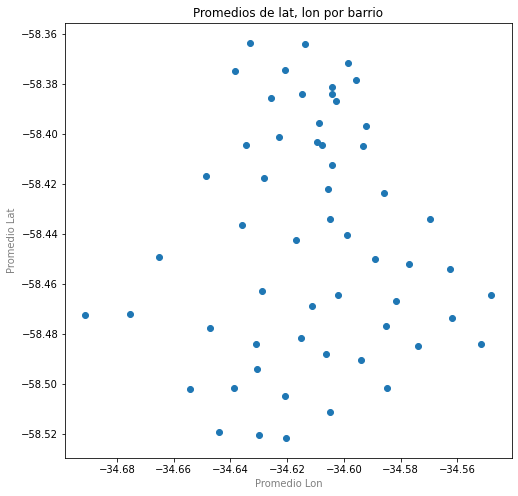

In [ ]:
L= lon_city ['lon']
l= lat_city ['lat']
plt.figure(figsize=(8,8))
plt.scatter(l, L)
plt.title('Promedios de lat, lon por barrio')
plt.xlabel('Promedio Lon', size = 10, color='gray')
plt.ylabel('Promedio Lat', size = 10, color='gray')
plt.show()

In [ ]:
#Revisamos el % de valores faltantes por cada columna
for col in df_3.columns: 
  nulos= df_3[col].isna().sum()
  print(col, "{:.2f}%".format(nulos*100/67712))

barrio 0.00%
lat 0.00%
lon 0.00%
region 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 0.00%
surface_total 0.00%
surface_covered 0.00%
price 0.00%
property_type 0.00%


Como se puede ver ya no tenemos más valores faltantes en el set de datos

###**3-Encoding**

In [ ]:
df_3.head()

,barrio,lat,lon,region,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Boedo,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,PH
1,Palermo,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0,PH
2,Palermo,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0,PH
3,Villa Crespo,-34.593779,-58.441239,Capital Federal,2.0,1.0,1.0,56.0,56.0,150000.0,PH
4,Villa Crespo,-34.600988,-58.433061,Capital Federal,2.0,1.0,1.0,70.0,70.0,159500.0,PH


In [ ]:
# Cantidad de barrios únicos
df_3['barrio'].unique().size

57

In [ ]:
# Cantidad de tipos de propiedades
df_3['property_type'].unique().size

3

Buscamos generar variables dummies, 

- Barrio => estaríamos adicionando 57 columnas al set. Como considero que es demasiado voy a buscar reducirlo. Lo que se propoen como solución es tomar los barrios que reunen el 80% de las propiedaes que son 20 barrios. A estos 20 barrios seguirlos identificando por su nombre y al resto de los 37 barrios agruparlos bajo el nombre de 'otros'. Para ello en las líneas debajo se crea una nueva columna => 'barrios_agrupados'. Luego de esto se se aplica la función get_dummies a dicha columna y se elimina la columna 'barrios'

- Tipo de propiedad => estaríamos adicionando 3 columnas al set al aplicar la fn. get_dummies

In [ ]:
# TABLA DE FRECUECIAS - CANTIDAD DE PROPIEDADES POR BARRIO

#Agrupamiento por tipo de proiedad
print('Agrupamiento por cantidad de propiedades')
print('')
frec = pd.value_counts(df_3['barrio'])

#transformo en el df de pandas
df_frec= pd.DataFrame(frec)

#agrego columnas 'Frec_abs'
df_frec.columns = ['Frec_abs']

#calculo la columna 'Frec_abs'
df_frec['Frec_rel_%'] = 100* (df_frec.Frec_abs / df_3.shape[0])

#tabla de frecuencias absolutas / reltivas / acumulada
frec_rel_val= df_frec['Frec_rel_%'].values # es una lista que contiene los valores de frec_rel_%

acum = []
valor_acum = 0

for i in frec_rel_val:
    valor_acum = valor_acum + i 
    acum.append(valor_acum)

df_frec['frec_rel_%_acum'] = acum
print(df_frec.head(20)) # son los tipos de propiedades ordenados de mayor a menos según su cantidad - frecuencia absoluta - frecuencia relativa.

Agrupamiento por cantidad de propiedades

                   Frec_abs  Frec_rel_%  frec_rel_%_acum
Palermo               10092   14.904301        14.904301
Almagro                6209    9.169719        24.074019
Villa Crespo           5364    7.921786        31.995806
Caballito              4783    7.063741        39.059546
Belgrano               4691    6.927871        45.987417
Recoleta               3892    5.747873        51.735291
Villa Urquiza          2686    3.966801        55.702091
Barrio Norte           2528    3.733459        59.435551
Balvanera              2135    3.153060        62.588611
Flores                 1781    2.630258        65.218868
Nuñez                  1574    2.324551        67.543419
Parque Centenario      1139    1.682124        69.225543
Colegiales             1138    1.680647        70.906191
Villa del Parque       1092    1.612713        72.518904
Villa Devoto            980    1.447306        73.966210
Puerto Madero           932    1.376418       

En 20 barrios tengo el 80% de las propiedades. 
Se crea una nueva columna 'Barrio_agrupado' donde se detallarán estos 20 barrios y los demás se agruparán bajo el nombre de 'otros'

In [ ]:
conditionlist = [
 
(df_3['barrio'] =='Palermo'),
(df_3['barrio'] =='Almagro'),
(df_3['barrio'] =='Villa Crespo'),
(df_3['barrio'] =='Caballito'),
(df_3['barrio'] =='Belgrano'),
(df_3['barrio'] =='Recoleta'),
(df_3['barrio'] =='Villa Urquiza'),
(df_3['barrio'] =='Barrio Norte'),
(df_3['barrio'] =='Balvanera'),
(df_3['barrio'] =='Flores'),
(df_3['barrio'] =='Nuñez'),
(df_3['barrio'] =='Parque Centenario'),
(df_3['barrio'] =='Colegiales'),
(df_3['barrio'] =='Villa del Parque'),
(df_3['barrio'] =='Villa Devoto'),
(df_3['barrio'] =='Puerto Madero'),
(df_3['barrio'] =='San Cristobal'),
(df_3['barrio'] == 'Saavedra'),
(df_3['barrio'] == 'San Telmo'),
(df_3['barrio'] == 'Paternal'),
#otros - agupado
(df_3['barrio'] == 'Floresta'),
(df_3['barrio'] =='Boedo'),
(df_3['barrio'] =='Once'),
(df_3['barrio'] =='Monserrat'),
(df_3['barrio'] =='San Nicolás'),
(df_3['barrio'] =='Parque Chacabuco'),
(df_3['barrio'] =='Villa Pueyrredón'),
(df_3['barrio'] =='Retiro'),
(df_3['barrio'] =='Chacarita'),
(df_3['barrio'] =='Barracas'),
(df_3['barrio'] =='Congreso'),
(df_3['barrio'] =='Las Cañitas'),
(df_3['barrio'] =='Liniers'),
(df_3['barrio'] =='Monte Castro'),
(df_3['barrio'] =='Coghlan'),
(df_3['barrio'] =='Mataderos'),
(df_3['barrio'] =='Centro / Microcentro'),
(df_3['barrio'] =='Villa Luro'),
(df_3['barrio'] =='Abasto'),
(df_3['barrio'] =='Constitución'),
(df_3['barrio'] =='Villa Lugano'),
(df_3['barrio'] =='Parque Patricios'),
(df_3['barrio'] =='Villa General Mitre'),
(df_3['barrio'] =='Villa Santa Rita'),
(df_3['barrio'] =='Boca'),
(df_3['barrio'] =='Villa Ortuzar'),
(df_3['barrio'] =='Parque Chas'),
(df_3['barrio'] =='Parque Avellaneda'),
(df_3['barrio'] =='Versalles'),
(df_3['barrio'] =='Tribunales'),
(df_3['barrio'] =='Agronomía'),
(df_3['barrio'] =='Pompeya'),
(df_3['barrio'] =='Villa Real'),
(df_3['barrio'] =='Velez Sarsfield'),
(df_3['barrio'] =='Villa Soldati'),
(df_3['barrio'] =='Villa Riachuelo'),
(df_3['barrio'] =='Catalinas')]

choicelist = ['Palermo','Almagro','Villa Crespo','Caballito','Belgrano','Recoleta','Villa Urquiza','Barrio Norte','Balvanera','Flores','Nuñez','Parque Centenario','Colegiales','Villa del Parque',
              'Villa Devoto','Puerto Madero','San Cristobal','Saavedra','San Telmo','Paternal','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros'
              ,'otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros','otros' ]
 
df_3['barrio_agrupado'] = np.select(conditionlist, choicelist, default='Not Specified')

In [ ]:
df_3.head()

,barrio,lat,lon,region,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,barrio_agrupado
0,Boedo,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,PH,otros
1,Palermo,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Palermo
2,Palermo,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Palermo
3,Villa Crespo,-34.593779,-58.441239,Capital Federal,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Villa Crespo
4,Villa Crespo,-34.600988,-58.433061,Capital Federal,2.0,1.0,1.0,70.0,70.0,159500.0,PH,Villa Crespo


In [ ]:
# TABLA DE FRECUECIAS - CANTIDAD DE PROPIEDADES POR BARRIO SEGÚN COLUMNA => 'BARRIOS_AGRUPADO'

#Agrupamiento por tipo de proiedad
print('Agrupamiento por cantidad de propiedades')
print('')
frec = pd.value_counts(df_3['barrio_agrupado'])

#transformo en el df de pandas
df_frec= pd.DataFrame(frec)

#agrego columnas 'Frec_abs'
df_frec.columns = ['Frec_abs']

#calculo la columna 'Frec_abs'
df_frec['Frec_rel_%'] = 100* (df_frec.Frec_abs / df_3.shape[0])

#tabla de frecuencias absolutas / reltivas / acumulada
frec_rel_val= df_frec['Frec_rel_%'].values # es una lista que contiene los valores de frec_rel_%

acum = []
valor_acum = 0

for i in frec_rel_val:
    valor_acum = valor_acum + i 
    acum.append(valor_acum)

df_frec['frec_rel_%_acum'] = acum
print(df_frec) # son los tipos de propiedades ordenados de mayor a menos según su cantidad - frecuencia absoluta - frecuencia relativa.

Agrupamiento por cantidad de propiedades

                   Frec_abs  Frec_rel_%  frec_rel_%_acum
otros                 13398   19.786744        19.786744
Palermo               10092   14.904301        34.691044
Almagro                6209    9.169719        43.860763
Villa Crespo           5364    7.921786        51.782550
Caballito              4783    7.063741        58.846290
Belgrano               4691    6.927871        65.774161
Recoleta               3892    5.747873        71.522034
Villa Urquiza          2686    3.966801        75.488835
Barrio Norte           2528    3.733459        79.222294
Balvanera              2135    3.153060        82.375354
Flores                 1781    2.630258        85.005612
Nuñez                  1574    2.324551        87.330163
Parque Centenario      1139    1.682124        89.012287
Colegiales             1138    1.680647        90.692935
Villa del Parque       1092    1.612713        92.305647
Villa Devoto            980    1.447306       

In [ ]:
# Elimino columna 'barrio'
df_3 = df_3.drop(columns=['barrio'])

In [ ]:
# hago dummie la columna 'barrio_agrupado'
df_3 = pd.get_dummies(df_3,columns=['barrio_agrupado']) 

In [ ]:
# hago dummie la columna 'property_type'
df_3 = pd.get_dummies(df_3,columns=['property_type'])

In [ ]:
df_3.head()

,lat,lon,region,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,barrio_agrupado_Almagro,barrio_agrupado_Balvanera,barrio_agrupado_Barrio Norte,barrio_agrupado_Belgrano,barrio_agrupado_Caballito,barrio_agrupado_Colegiales,barrio_agrupado_Flores,barrio_agrupado_Nuñez,barrio_agrupado_Palermo,barrio_agrupado_Parque Centenario,barrio_agrupado_Paternal,barrio_agrupado_Puerto Madero,barrio_agrupado_Recoleta,barrio_agrupado_Saavedra,barrio_agrupado_San Cristobal,barrio_agrupado_San Telmo,barrio_agrupado_Villa Crespo,barrio_agrupado_Villa Devoto,barrio_agrupado_Villa Urquiza,barrio_agrupado_Villa del Parque,barrio_agrupado_otros,property_type_Casa,property_type_Departamento,property_type_PH
0,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-34.593779,-58.441239,Capital Federal,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,-34.600988,-58.433061,Capital Federal,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
df_3.shape

(67712, 33)

###**4-Escalado de datos**

Z-Score => El Z-Score es una medida de cuán lejos está un dato del promedio de la
muestra a cual pertenece, medido en desviaciones estándar. Para aplicarlo utilizamos la clase => StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Elimino columna 'Región' para poder llevar adelante el escalado
df_3 = df_3.drop(columns=['region'])

In [ ]:
# Separo features y target para MinMax
X_for_scaler = df_3.drop('price', axis=1)
y_price = df_3['price']

In [ ]:
# MinMax Scaler
scaler = MinMaxScaler()
scaler.fit(X_for_scaler)

MinMaxScaler()

In [ ]:
X_scaled = scaler.transform(X_for_scaler)
scaled_df = pd.DataFrame(X_scaled, index=X_for_scaler.index, columns=X_for_scaler.columns)

# DAta set escalado => scaled_df
scaled_df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,barrio_agrupado_Almagro,barrio_agrupado_Balvanera,barrio_agrupado_Barrio Norte,barrio_agrupado_Belgrano,barrio_agrupado_Caballito,barrio_agrupado_Colegiales,barrio_agrupado_Flores,barrio_agrupado_Nuñez,barrio_agrupado_Palermo,barrio_agrupado_Parque Centenario,barrio_agrupado_Paternal,barrio_agrupado_Puerto Madero,barrio_agrupado_Recoleta,barrio_agrupado_Saavedra,barrio_agrupado_San Cristobal,barrio_agrupado_San Telmo,barrio_agrupado_Villa Crespo,barrio_agrupado_Villa Devoto,barrio_agrupado_Villa Urquiza,barrio_agrupado_Villa del Parque,barrio_agrupado_otros,property_type_Casa,property_type_Departamento,property_type_PH
count,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000
mean,0.609049,0.539040,0.282916,0.293402,0.172444,0.340786,0.451259,0.091697,0.031531,0.037335,0.069279,0.070637,0.016806,0.026303,0.023246,0.149043,0.016821,0.011283,0.013764,0.057479,0.012465,0.012627,0.012332,0.079218,0.014473,0.039668,0.016127,0.197867,0.006779,0.888557,0.104664
std,0.144309,0.197371,0.160977,0.135184,0.283047,0.184159,0.189439,0.288600,0.174748,0.189582,0.253929,0.256220,0.128547,0.160035,0.150683,0.356133,0.128602,0.105622,0.116511,0.232757,0.110948,0.111659,0.110362,0.270080,0.119431,0.195179,0.125965,0.398395,0.082054,0.314682,0.306122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.522699,0.415824,0.166667,0.166667,0.000000,0.198830,0.299270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.605363,0.553194,0.333333,0.333333,0.000000,0.304094,0.408759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.692045,0.673921,0.333333,0.333333,0.500000,0.450292,0.569343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###**5-Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).**

Decido que no es necesario aplicarlo en el caso en desarrollo ya que la cantidad de columnas (dimensiones) del data set luego de las acciones de preprocesamiento me parecen aceptables para trabajarlo de esa manera.



Volvemos a correr los tres modelos del proyectp 1 => Regresión lineal, árbol de decisión y vecinos cercanos con este nuevo dataset transformado => scaled_df


In [ ]:
from sklearn.linear_model import LinearRegression # modelo de regresión lineal
from sklearn.tree import DecisionTreeRegressor # modelo arbol de decisión para regresión lineal 
from sklearn.neighbors import KNeighborsRegressor # modelos de K vecinos cercanos para regresión lineal

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # MSE: eror cuadratico medio

In [ ]:
X_arbol = scaled_df
y_arbol = df_3['price']

In [ ]:
# Creamos los objetos

linear_model = LinearRegression() # regresión lineal
tree_regressor = DecisionTreeRegressor(max_depth=17, random_state=42) # árbol de decisión de profundidad 17 que es la que encontramos mejor resultado nos dio en el proyecto 1
knn_regressor = KNeighborsRegressor(n_neighbors=5) # KNN de 3 vecinos que es el valor que redujo más el error cuadratico medio en el proyecto 1

**Dividimos los el data set en train y test**

- Datos de entrenamiento => 70% del data set
- Datos de test / evaluación => 30% del data set

In [ ]:
X_arbol_train, X_arbol_test, y_arbol_train, y_arbol_test = train_test_split(X_arbol, y_arbol, test_size = 0.3,random_state=42) 

In [ ]:
linear_model.fit(X_arbol_train, y_arbol_train)
tree_regressor.fit(X_arbol_train, y_arbol_train)
knn_regressor.fit(X_arbol_train, y_arbol_train)

KNeighborsRegressor()

**Predecimos sobre el conjunto de train y el conjunto de test**
- Calculamos el RSME - Raíz del error cuadrático medio

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 58498.500844806826
Raíz del error cuadrático medio en Test: 59226.721470899385
Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 18378.560904377908
Raíz del error cuadrático medio en Test: 42918.14046423528
Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 34966.219311597066
Raíz del error cuadrático medio en Test: 44613.75562512188


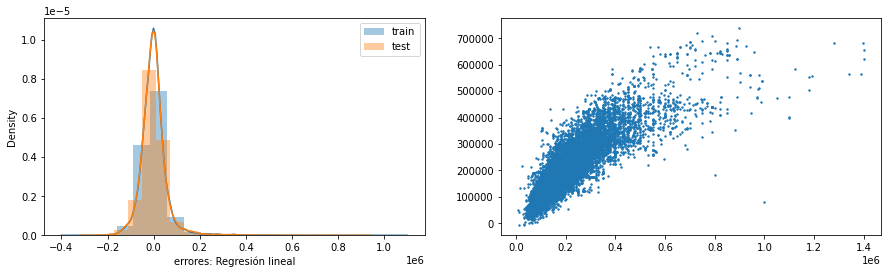

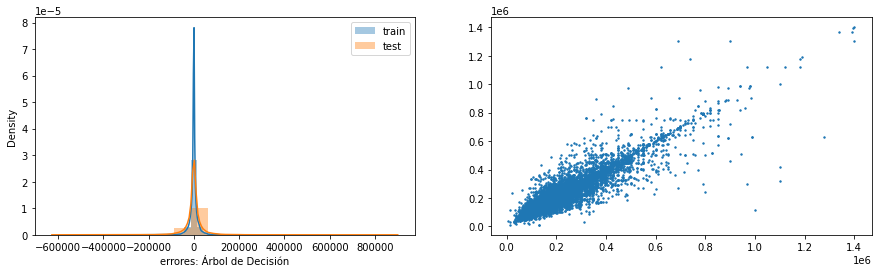

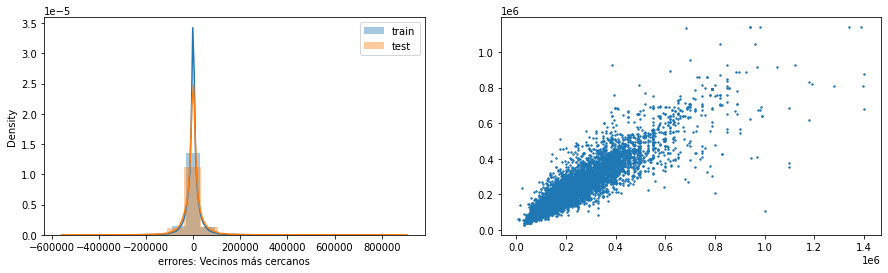

In [ ]:
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_arbol_train)
    y_test_pred = model.predict(X_arbol_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_arbol_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_arbol_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    sns.distplot(y_arbol_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_arbol_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel(f'errores: {modelos[i]}')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_arbol_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    

**Resultado proyecto 1 - repaso**

Modelo => Regresión lineal
- RMSE en train: 54.498
- RMSE en test: 202.449,37.

Modelo => Árbol de Decisión
- Max Depth seleccionado: 17.
- RMSE en train: 64.721,07.
- RMSE en test: 146.092,76.

Modelo => KNN vecinos más cercanos
- Max cant de vecinos: 3.
- RMSE en train: 103.804,21.
- RMSE en test: 152.317,82.

Como vemos, replicando el modelo del proyecto 1 pero con el nuevo dataset transformado => scaled_df , las mejoras en los resultado son notorias

Modelo => Regresión lineal
- RMSE en train: 58.498,50.
- RMSE en test: 59.266,72.

Modelo => Árbol de Decisión
- Max Depth seleccionado: 17.
- RMSE en train: 18.368,56.
- RMSE en test: 42.918,14.

Modelo => KNN vecinos más cercanos
- Max cant de vecinos: 3.
- RMSE en train: 34.966,21.
- RMSE en test: 44.613,75.

Se ve claramente que los modelos más sencillos si reciben data set bien pre procesados arrojan muy buenos resultados. De aquí que se destaca la importancia de las acciones de preparado de los set de datos


## **PARTE B - Modelos Avanzados**


###**Elección de modelos**

- Random Forest
- XGBoost

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.model_selection import KFold


In [ ]:
# Data set escalado y sin la columna precio
scaled_df.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,barrio_agrupado_Almagro,barrio_agrupado_Balvanera,barrio_agrupado_Barrio Norte,barrio_agrupado_Belgrano,barrio_agrupado_Caballito,barrio_agrupado_Colegiales,barrio_agrupado_Flores,barrio_agrupado_Nuñez,barrio_agrupado_Palermo,barrio_agrupado_Parque Centenario,barrio_agrupado_Paternal,barrio_agrupado_Puerto Madero,barrio_agrupado_Recoleta,barrio_agrupado_Saavedra,barrio_agrupado_San Cristobal,barrio_agrupado_San Telmo,barrio_agrupado_Villa Crespo,barrio_agrupado_Villa Devoto,barrio_agrupado_Villa Urquiza,barrio_agrupado_Villa del Parque,barrio_agrupado_otros,property_type_Casa,property_type_Departamento,property_type_PH
0,0.446237,0.670438,0.166667,0.166667,0.5,0.333333,0.416058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.637763,0.583409,0.166667,0.166667,0.0,0.187135,0.321168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.714877,0.530842,0.166667,0.166667,0.0,0.421053,0.357664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.636443,0.505438,0.166667,0.166667,0.0,0.251462,0.401460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.591154,0.551759,0.166667,0.166667,0.0,0.333333,0.503650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Data set sin escalar y con la columna precios
df_3.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,barrio_agrupado_Almagro,barrio_agrupado_Balvanera,barrio_agrupado_Barrio Norte,barrio_agrupado_Belgrano,barrio_agrupado_Caballito,barrio_agrupado_Colegiales,barrio_agrupado_Flores,barrio_agrupado_Nuñez,barrio_agrupado_Palermo,barrio_agrupado_Parque Centenario,barrio_agrupado_Paternal,barrio_agrupado_Puerto Madero,barrio_agrupado_Recoleta,barrio_agrupado_Saavedra,barrio_agrupado_San Cristobal,barrio_agrupado_San Telmo,barrio_agrupado_Villa Crespo,barrio_agrupado_Villa Devoto,barrio_agrupado_Villa Urquiza,barrio_agrupado_Villa del Parque,barrio_agrupado_otros,property_type_Casa,property_type_Departamento,property_type_PH
0,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
# Sepaparamos la variable target y ejecutamos el train test split

X = scaled_df
y = df_3['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [ ]:
# Creamos los objetos

# RandomForestRegressor
randomForest = RandomForestRegressor(random_state=42)

# XGBRegressor
xgbRegressor = XGBRegressor(random_state=42)

**Cross Validation** =>El objetivo de la validación cruzada es
obtener una evaluación de performance
de nuestro modelo que sea independiente
de la partición en entrenamiento y prueba
de los datos  => https://runebook.dev/es/docs/scikit_learn/modules/cross_validation

In [ ]:
# Cross Validation

n_cv = 4    

# CV RandomForest
randomForest_scores = cross_val_score(randomForest, X, y, n_jobs=-1, cv=n_cv)  

# CV XGBRegressor
xgbRegressor_scores = cross_val_score(xgbRegressor, X, y, n_jobs=-1, cv=n_cv)  

In [ ]:
print('randomForest_scores: ',randomForest_scores)
print('xgbRegressor_scores: ',xgbRegressor_scores)

randomForest_scores:  [0.9057446  0.90858273 0.90688062 0.91805674]
xgbRegressor_scores:  [0.79856391 0.80101212 0.79691353 0.80657933]


In [ ]:
models=['RandomForest', 'XGBRegressor']
for name, model_score in zip(models,[randomForest_scores, xgbRegressor_scores]):
    print(f"Accuracy para {name}: %0.2f (+/- %0.2f)" % (model_score.mean(), model_score.std() * 2))

Accuracy para RandomForest: 0.91 (+/- 0.01)
Accuracy para XGBRegressor: 0.80 (+/- 0.01)


In [ ]:
# Entrenamiento de los Modelos

randomForest.fit(X_train, y_train)
xgbRegressor.fit(X_train, y_train)

[18:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=42)

- Calculamos el RSME - Raíz del error cuadrático medio

Modelo: RandomForest
Raíz del error cuadrático medio en Train: 13637.29439669838
Raíz del error cuadrático medio en Test: 34133.108116968324
Modelo: XGBRegressor
Raíz del error cuadrático medio en Train: 49480.34304457537
Raíz del error cuadrático medio en Test: 51484.36155816662


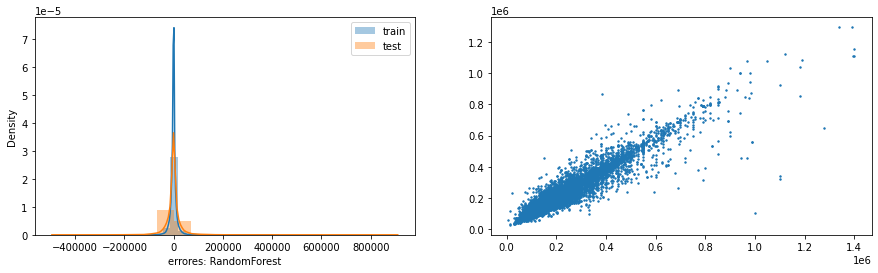

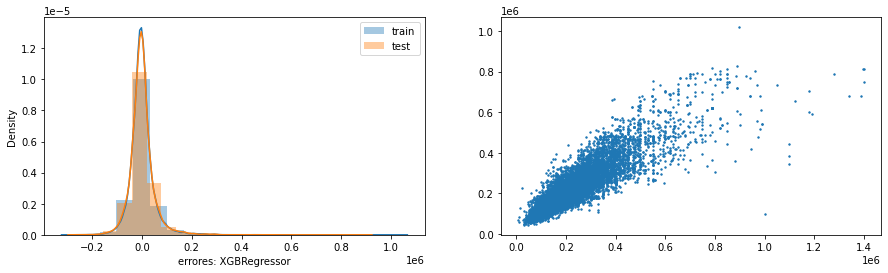

In [ ]:
modelos = ['RandomForest', 'XGBRegressor']

for i, model in enumerate([randomForest, xgbRegressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel(f'errores: {modelos[i]}')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

Como se puede ver los valores optenidos con el random forest superan a los valores de los tres modelos ensayadpos previamente => árbolr, KNN y regresión líneal.

###**Optimización de Parámetros**

- RandomForestRegressor


Se crea la => random_grid

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 150, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split, #no
               #'min_samples_leaf': min_samples_leaf,  #no
               #'bootstrap': bootstrap}
}

print(random_grid)

{'n_estimators': [15, 30, 45, 60, 75, 90, 105, 120, 135, 150], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [5, 10]}


Creamos el objeto y lo entrenamos

In [ ]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, None],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [15, 30, 45, 60, 75, 90,
                                                         105, 120, 135, 150]},
                   random_state=42)

Podemos ver los mejores parámetros y el mejor score luego de aplicar random search

In [ ]:
rf_random.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'param_min_samples_split', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
print("Mejores parametros: "+str(rf_random.best_params_))
print("Mejor Score: "+str(rf_random.best_score_)+'\n')

scores = pd.DataFrame(rf_random.cv_results_)
scores.head(1) # este data set nos muestra todos los resultados que nos devuelve el RandomizedSearchCV

Mejores parametros: {'n_estimators': 120, 'min_samples_split': 5, 'max_depth': None}
Mejor Score: 0.892968535013129



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,16.458967,0.184763,0.48314,0.012197,75,5,30,"{'n_estimators': 75, 'min_samples_split': 5, '...",0.891951,0.897246,0.886372,0.891857,0.00444,4


In [ ]:
# creamos el objeto con los mejores parametros identificados
rf_random_test = RandomForestRegressor(max_depth= 30, min_samples_split= 5, n_estimators= 120, random_state=42)

In [ ]:
# Entrenamos
rf_random_test.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=120,
                      random_state=42)

- Calculamos el RSME - Raíz del error cuadrático medio

Modelo: RandomForest
Raíz del error cuadrático medio en Train: 16659.41785940845
Raíz del error cuadrático medio en Test: 34745.15984577777


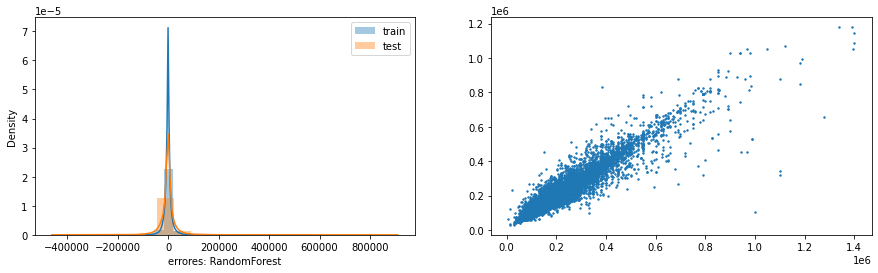

In [ ]:
modelos = ['RandomForest']

for i, model in enumerate([randomForest]):
    y_train_pred = rf_random_test.predict(X_train)
    y_test_pred = rf_random_test.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel(f'errores: {modelos[i]}')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

A modo comparativo podemos ver

Modelo: RandomForest sin optimizar
- Raíz del error cuadrático medio en Train: 13637.29
- Raíz del error cuadrático medio en Test: 34133.10


Modelo: RandomForest optimizado
- Raíz del error cuadrático medio en Train: 16659.41
- Raíz del error cuadrático medio en Test: 34745.15

Observamos mejores resultado previo a la optimización. 

- XGBRegressor

In [ ]:
import xgboost as xgb

In [ ]:
parameters = {'nthread': [4],
              'max_depth': np.arange(13, 16),
              'n_estimators': np.arange(215, 219) #n_estimators = [int(x) for x in np.linspace(start = 15, stop = 150, num = 10)]   o  'n_estimators': np.arange(150, 250)
              }

In [ ]:
gridsearch_xgboost = GridSearchCV(XGBRegressor(booster='gbtree',
                                             learning_rate=.02,
                                             importance_type='total_cover',
                                             colsample_bytree=0.62,
                                             random_state=42,
                                             n_jobs=-1),
                                param_grid=parameters, n_jobs=-1) #objective ='reg:squarederror',tree_method = 'gpu_hist'

In [ ]:
gridsearch_xgboost.fit(X_train, y_train)

[21:10:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(estimator=XGBRegressor(colsample_bytree=0.62,
                                    importance_type='total_cover',
                                    learning_rate=0.02, n_jobs=-1,
                                    random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([13, 14, 15]),
                         'n_estimators': array([215, 216, 217, 218]),
                         'nthread': [4]})

Podemos ver los mejores parámetros y el mejor score luego de aplicar grid search

In [ ]:
gridsearch_xgboost.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'param_nthread', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
print("Mejores parametros: "+str(gridsearch_xgboost.best_params_))
print("Mejor Score: "+str(gridsearch_xgboost.best_score_)+'\n')

scores = pd.DataFrame(gridsearch_xgboost.cv_results_)
scores.head(1) # este data set nos muestra todos los resultados que nos devuelve el RandomizedSearchCV

Mejores parametros: {'max_depth': 15, 'n_estimators': 218, 'nthread': 4}
Mejor Score: 0.9048946563714922



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_nthread,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,47.911862,0.251543,1.306979,0.006892,13,215,4,"{'max_depth': 13, 'n_estimators': 215, 'nthrea...",0.890762,0.908639,0.902481,0.900799,0.893741,0.899284,0.006378,12


In [ ]:
# Creamos el objeto con los mejores parametros identificados
xgb_reg = XGBRegressor(max_depth= 15, n_estimators= 218, nthread= 4, n_jobs=-1)

In [ ]:
# Entrenamos
xgb_reg.fit(X_train, y_train)

[21:19:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=15, n_estimators=218, n_jobs=-1, nthread=4)

- Calculamos el RSME - Raíz del error cuadrático medio

Modelo: XGBRegressor
Raíz del error cuadrático medio en Train: 8576.98273869258
Raíz del error cuadrático medio en Test: 33019.19742689992


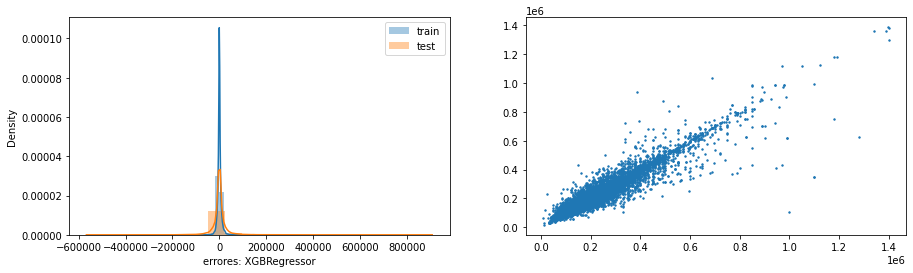

In [ ]:
modelos = ['XGBRegressor']

for i, model in enumerate([randomForest]):
    y_train_pred = xgb_reg.predict(X_train)
    y_test_pred = xgb_reg.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel(f'errores: {modelos[i]}')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

A modo comparativo podemos ver

Modelo: XGBRegressor sin optimizar
- Raíz del error cuadrático medio en Train: 49480.34
- Raíz del error cuadrático medio en Test: 51484.36


Modelo: XGBRegressor optimizado
- Raíz del error cuadrático medio en Train: 8576.98
- Raíz del error cuadrático medio en Test: 33019.19

Observamos mejores resultado previo a la optimización. 

###**Evaluación de Desempeño**

No handles with labels found to put in legend.


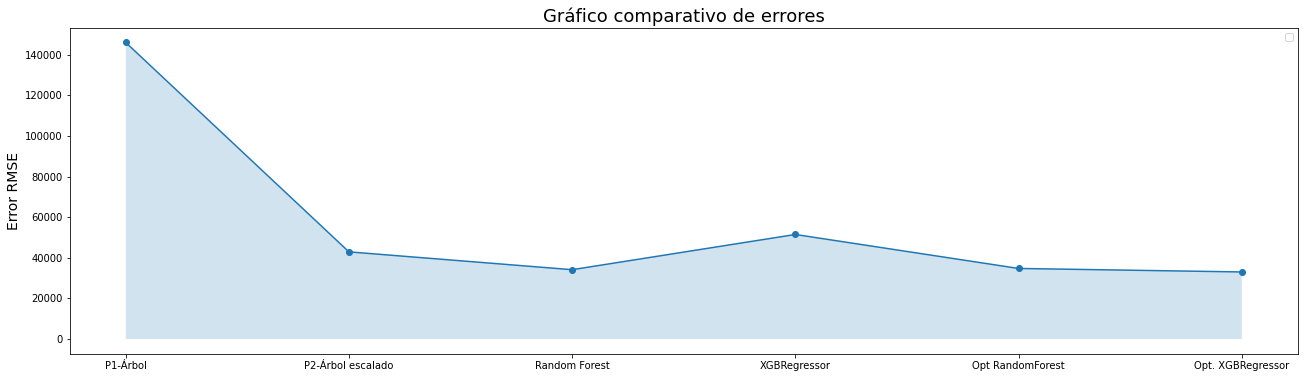

In [ ]:
plt.figure(figsize=(22, 6))
plt.title('Gráfico comparativo de errores', size=18)
models = ['P1-Árbol','P2-Árbol escalado' , 'Random Forest', 'XGBRegressor', 'Opt RandomForest', 'Opt. XGBRegressor']
errors = [146092, 42918, 34133, 51484, 34745, 33019 ]

plt.plot(models, errors, 'o-')
plt.fill_between(models, errors, alpha=.2)

plt.ylabel('Error RMSE', size=14)
plt.legend()

Como se ve a nivel gráfico el modelo que más minimiza el error cuadratico medio es el XGBRegressor optimizado con grid search. En segúndo lugar el modelo que mejor performa fue el Random Forest sin optimizar seguido muy de cerca por el random Forest optimizado.

Un punto a destacar es que el Random Forest corrio mucho más rapido, es decir, que a nivel de computo fue más rapido y el resultado muy próximo al mejor modelo. 

## **PARTE C - Interpretación de modelos**

A continuación se efectua el análisis de las future más importantes para los modelos de, 

- Random Forest optimizado
- RandomForest sin optimizar
- XGBRegressor optimizados


In [ ]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [ ]:
# Random Forest optimizado
base_imp = imp_df(X_train.columns, rf_random_test.feature_importances_)

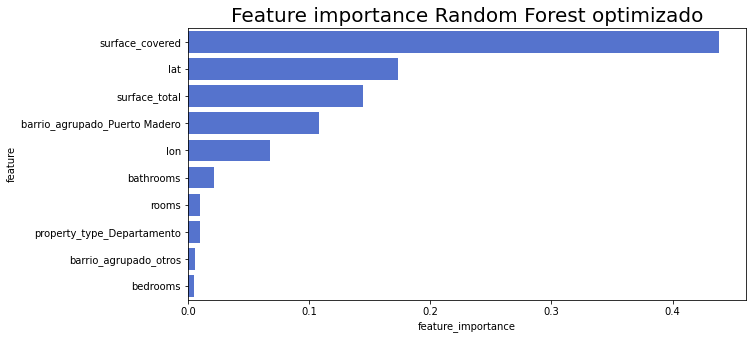

In [ ]:
plt.figure(figsize=(10,5))
var_imp_plot(base_imp.head(10), 'Feature importance Random Forest optimizado')

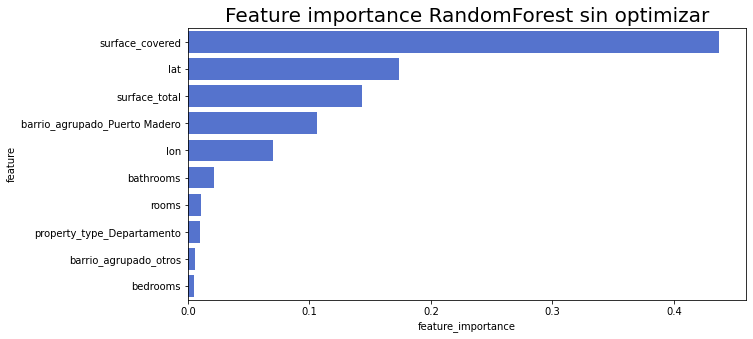

In [ ]:
# RandomForest sin optimizar => randomForest
base_imp_r = imp_df(X_train.columns, randomForest.feature_importances_)

plt.figure(figsize=(10,5))
var_imp_plot(base_imp_r.head(10), 'Feature importance RandomForest sin optimizar')

XGBRegressor optimizados =>xgb_reg

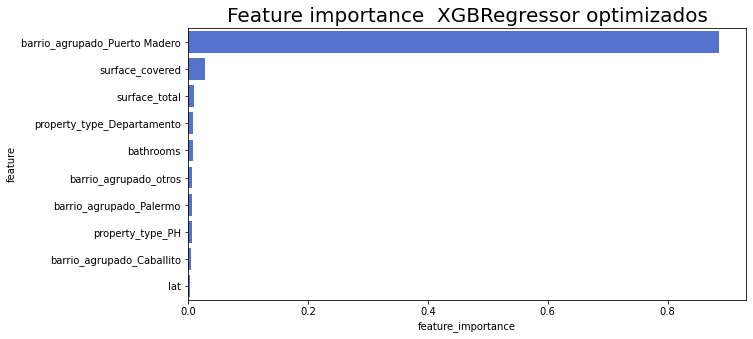

In [ ]:
# XGBRegressor optimizados =>xgb_reg
base_imp_xgb = imp_df(X_train.columns, xgb_reg.feature_importances_)

plt.figure(figsize=(10,5))
var_imp_plot(base_imp_xgb.head(10), 'Feature importance  XGBRegressor optimizados')

¿Qué variables fueron relevantes para el modelo para hacer una predicción? 

Como se puede observar las variables / features más relevantes para el modelo de RandomForest sin optimizar y optimizado fueorn las mismas y en el mismo orden, 

1- Superficie cubierta

2- Latitud

3- Superfie total

4- Barrio agrupado Puerto Madero

5- Longitud

6- Bathrooms

7- Rooms

8- Tipo propiedad departamento

9- barrio agrupado otros

10- bedrooms

Para XGBRegressor optimizados fueron (están 6 tambien aparecen en el RadamForest)

1- Barrio agrupado Puerto Madero. llama la atención el peso que atribuye a esta feature

2- Superficie cubierta

3- Superfie total

4- Tipo propiedad departamento

5- Bathrooms

6- barrio agrupado otros

10- Latitud

Esta feuture no esta en el top 10 para el RandomForest pero si en el top 10 del XGBRegressor  

7- Barrio agrupado Palermo

8- Tipo propiedad PH

9- barrio agrupado Caballito

Un detalle a destacar es que en el top 10 de los tres modelos aparece 'barrio agrupado otros' que es la features que se creo en la cual se agruparon todos los barrios cuya cantidad de propiedaes estaba fuera del 80% del análisis de Pareto realizado. 

## **Conclusion**

Por medio del presente trabajo logre reforzar el concepto que en muchas ocasiones nos remarcaron en las clases y se resume en la famosa frase de  => 'garbage in garbage out'. 

La mayor mejora o la más notoria en las métricas no se dio en si por útilizar modelos más complejos y avanzados si no por efectuar un mejor pre procesamiento del set de datos. Aclarando que si el set esta bien procesado y paso por proceso de quality assurance adecuados, es claro que un modelo más complejo y optimizado podrá arrojar mejores resultado que uno más sencillo, pero seguramente con un mayor costo computaciones (procesamiento de datos) que deberemos evaluar si es justificado en post de la mejora.



